In [1]:
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_1state_model, CSTR_3state_model
from Solvers import ESDIRK
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# ESDIRK23

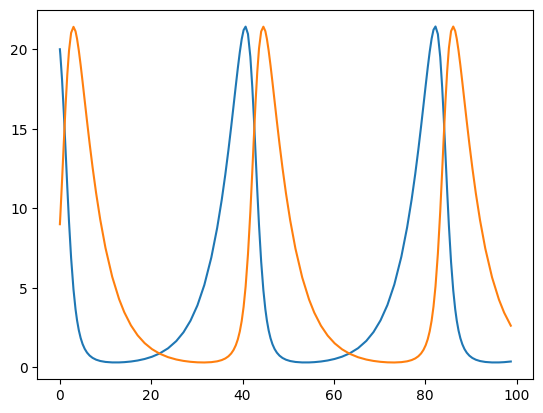

In [7]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

N = 1000
h0 = 0.1

tol = 1e-3

method = 'ESDIRK23'

f, J = prey_predator_model(a, b, esdirk = True)

T, X, G, _, _ = ESDIRK(f, J, t_span, x0, h0, tol, tol, Method=method)


plt.plot(T,X)

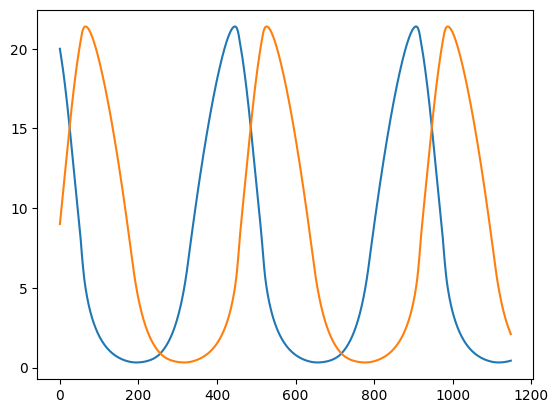

In [6]:
plt.plot(G)